<a href="https://colab.research.google.com/github/nkanungo/EVA6/blob/main/S10_TinyImagenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment S10

In this assignment Resnet architecture is used to train Tiny Imagnet dataset and used Data Augmmentation. Developed APIs so as to load data, train, test and show results.

Following changes are done:

1. Added Data Augmentations (Albumentatons)
i. Cutout
ii. Horizontal Flip
iii. Padding
iv. Random Crop  


2. Added LRFinder to get good starting learning rate
3. Used ReduceLROnPlateau strategey for scheduling learning rates

Got best validation accuracy: 57.63%


In [ ]:
%matplotlib inline
import autoreload
%load_ext autoreload
%autoreload

In [ ]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-rnom3uw8
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-rnom3uw8
  Created wheel for albumentations: filename=albumentations-1.0.3-py3-none-any.whl size=98755 sha256=3128a5cc2082ef02befbae9fc22c4360ff4f2a61464f8eb2d9b8595fc97bed30
  Stored in directory: /tmp/pip-ephem-wheel-cache-41gdem_y/wheels/63/11/1a/c77caf3ae9b9b6d57b3ee5e6a41a50f3bc12c66a70f6b90bf0
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


## Mount the google drive

In [ ]:
# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/nkanungo/EVA6.git

Cloning into 'EVA6'...
remote: Enumerating objects: 865, done.
remote: Counting objects: 100% (447/447), done.
remote: Compressing objects: 100% (391/391), done.
remote: Total 865 (delta 257), reused 129 (delta 41), pack-reused 418
Receiving objects: 100% (865/865), 14.69 MiB | 22.55 MiB/s, done.
Resolving deltas: 100% (458/458), done.


## Copy all the API python files from the google drive to local folder

Follwing python files are imported from google drive. Purpsoe of these files are as below:

model.py - Defines the model class Net
train_test.py- API for training and testing
accuracy_utils - API foro getting test accuracy and per class accuracy
data_loader.py - API for loading train and test data
data_transform.py - API for transforming and normalizing data
plot_metrics.py - API for plotting metrics

In [ ]:
!cp -rf '/content/EVA6/helper/data_loaders' .
!cp -rf '/content/EVA6/helper/data_transformations' .
!cp -rf '/content/EVA6/helper/models' .
!cp -rf '/content/EVA6/helper/utils' .
!cp -rf '/content/EVA6/helper/main' .

## Import all the libraries

In [ ]:
!pip install torchsummary
!pip install torch-lr-finder
from main.main import train_valid_split, load_transfer, define_network,lr_finder_exp,lr_finder_linear,train_model,display_test_data,predict,print_test_accuracy,accuracy_per_class,plot_accuracy



Training a Classifier
=====================



Training an image classifier
----------------------------

I have done the following steps in order:

1. Load and normalizing the Tiny Imagement training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data





 ## 1. Loading and normalizing Tiny Imagenet

 I have used APIs get_train_loader, get_test_loader to load train data and test data respectively. Both the APIs internally uses torchvision. I have used get_transform API to transform tensors in the range [-1,1]



In [ ]:
!wget  http://cs231n.stanford.edu/tiny-imagenet-200.zip

--2021-07-21 10:37:54--  http://cs231n.stanford.edu/tiny-imagenet-200.zip
Resolving cs231n.stanford.edu (cs231n.stanford.edu)... 171.64.68.10
Connecting to cs231n.stanford.edu (cs231n.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248100043 (237M) [application/zip]
Saving to: ‘tiny-imagenet-200.zip’

tiny-imagenet-200.z 100%[===================>] 236.61M  7.60MB/s    in 20s     

2021-07-21 10:38:15 (11.6 MB/s) - ‘tiny-imagenet-200.zip’ saved [248100043/248100043]



In [ ]:
!rm -rf tiny-imagenet-200
!unzip -qq tiny-imagenet-200.zip

## Perform 70:30 split between training and validation

In [ ]:
train_valid_split(base_dir= './tiny-imagenet-200', valid_split = 0.3)

## Visualizing some of the images in train dataset



/usr/local/lib/python3.7/dist-packages/albumentations/augmentations/transforms.py:690: FutureWarning: This class has been deprecated. Please use CoarseDropout
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


n02321529 n02977058 n02206856 n07579787


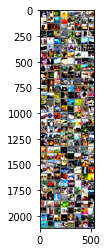

In [ ]:
trainloader, testloader, classes = load_transfer('./tiny-imagenet-200', 256, 64)

## 2. Define a Convolution Neural Network

I have defined the basic ResNet18 model and added dropout to it



In [ ]:
define_network()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
         Dropout2d-5           [-1, 64, 64, 64]               0
            Conv2d-6           [-1, 64, 64, 64]          36,864
       BatchNorm2d-7           [-1, 64, 64, 64]             128
         Dropout2d-8           [-1, 64, 64, 64]               0
        BasicBlock-9           [-1, 64, 64, 64]               0
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
        Dropout2d-12           [-1, 64, 64, 64]               0
           Conv2d-13           [-1, 64, 64, 64]          36,864
      BatchNorm2d-14           [-1, 64,

/content/models/resnet18.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


## 3. Define a Loss function and optimizer and train the model

I have used Classification Cross-Entropy loss and SGD with learning rate 0.01 with momentum 0.9.

## 4. Train the model

 I have used 100 epochs to train the model

In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []



In [ ]:
!pip install torch-lr-finder

## Use LRFinder to find good starting learning rate

- First use exponetial step mode to find good learning rate range between 0.001 and 10
- Next use linear step mode to find good learning rate

In [ ]:
!pip install torch-lr-finder

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/content/models/resnet18.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)



Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 3.59E+00


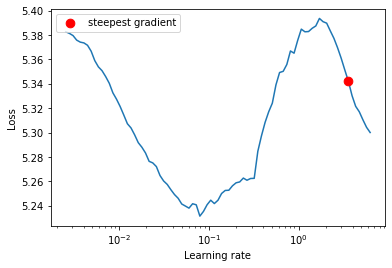

In [ ]:
import torch.optim as optim
criterion = lr_finder_exp(lr=0.001,momentum=0.9, weight_decay=0.0001,end_lr=10, num_iter=100, trainloader = trainloader)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/content/models/resnet18.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)



Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 6.73E-02


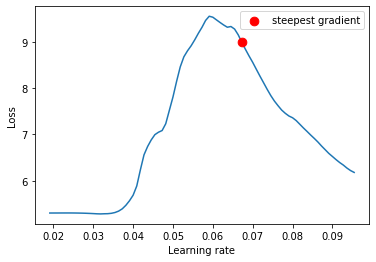

In [ ]:
lr_finder_linear(lr=0.01,momentum=0.9, weight_decay=0.0001,end_lr=0.1, num_iter=100,trainloader = trainloader,testloader = testloader,criterion = criterion)

## 3. Define a Loss function and optimizer and train the model

I have used Classification Cross-Entropy loss and SGD with learning rate 0.01 with momentum 0.9.

## 4. Train the model

 I have used 50 epochs to train the model

In [ ]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.optim as optim
import os


train_model(lr=0.03, momentum=0.9, weight_decay=0.0001,EPOCHS = 50,trainloader = trainloader,testloader = testloader)

  0%|          | 0/301 [00:00<?, ?it/s]

EPOCH: 0


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/content/models/resnet18.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=3.905444860458374 Batch_id=300 Accuracy=7.24: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 4.2453, Accuracy: 3370/33000 (10.21%)

Test Accuracy: 10.212121212121213 has increased. Saving the model
EPOCH: 1


Loss=3.5041403770446777 Batch_id=300 Accuracy=16.83: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 4.3459, Accuracy: 4002/33000 (12.13%)

Test Accuracy: 12.127272727272727 has increased. Saving the model
EPOCH: 2


Loss=3.2803735733032227 Batch_id=300 Accuracy=23.50: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 3.4178, Accuracy: 7553/33000 (22.89%)

Test Accuracy: 22.887878787878787 has increased. Saving the model
EPOCH: 3


Loss=2.6889028549194336 Batch_id=300 Accuracy=29.10: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 3.4637, Accuracy: 7638/33000 (23.15%)

Test Accuracy: 23.145454545454545 has increased. Saving the model
EPOCH: 4


Loss=2.764744758605957 Batch_id=300 Accuracy=33.90: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 3.0695, Accuracy: 9756/33000 (29.56%)

Test Accuracy: 29.563636363636363 has increased. Saving the model
EPOCH: 5


Loss=2.469947099685669 Batch_id=300 Accuracy=38.03: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.9622, Accuracy: 10567/33000 (32.02%)

Test Accuracy: 32.02121212121212 has increased. Saving the model
EPOCH: 6


Loss=2.5243735313415527 Batch_id=300 Accuracy=41.37: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.7839, Accuracy: 11920/33000 (36.12%)

Test Accuracy: 36.121212121212125 has increased. Saving the model
EPOCH: 7


Loss=2.4045369625091553 Batch_id=300 Accuracy=44.51: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.9726, Accuracy: 11232/33000 (34.04%)

EPOCH: 8


Loss=1.8990914821624756 Batch_id=300 Accuracy=47.36: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.5823, Accuracy: 13014/33000 (39.44%)

Test Accuracy: 39.43636363636364 has increased. Saving the model
EPOCH: 9


Loss=2.0995383262634277 Batch_id=300 Accuracy=49.91: 100%|██████████| 301/301 [05:27<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.6306, Accuracy: 13070/33000 (39.61%)

Test Accuracy: 39.60606060606061 has increased. Saving the model
EPOCH: 10


Loss=2.0507686138153076 Batch_id=300 Accuracy=52.28: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.6358, Accuracy: 12819/33000 (38.85%)

EPOCH: 11


Loss=1.6554663181304932 Batch_id=300 Accuracy=54.27: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.7443, Accuracy: 13038/33000 (39.51%)

EPOCH: 12


Loss=1.7243167161941528 Batch_id=300 Accuracy=56.88: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.4921, Accuracy: 14293/33000 (43.31%)

Test Accuracy: 43.31212121212121 has increased. Saving the model
EPOCH: 13


Loss=1.547013759613037 Batch_id=300 Accuracy=58.60: 100%|██████████| 301/301 [05:29<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3528, Accuracy: 15130/33000 (45.85%)

Test Accuracy: 45.84848484848485 has increased. Saving the model
EPOCH: 14


Loss=1.5077406167984009 Batch_id=300 Accuracy=60.93: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.4384, Accuracy: 14560/33000 (44.12%)

EPOCH: 15


Loss=1.3876498937606812 Batch_id=300 Accuracy=62.71: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3939, Accuracy: 15448/33000 (46.81%)

Test Accuracy: 46.81212121212121 has increased. Saving the model
EPOCH: 16


Loss=1.3383220434188843 Batch_id=300 Accuracy=64.91: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.4275, Accuracy: 15382/33000 (46.61%)

EPOCH: 17


Loss=1.070878028869629 Batch_id=300 Accuracy=66.70: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3359, Accuracy: 15825/33000 (47.95%)

Test Accuracy: 47.95454545454545 has increased. Saving the model
EPOCH: 18


Loss=1.2049081325531006 Batch_id=300 Accuracy=68.60: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3706, Accuracy: 15660/33000 (47.45%)

EPOCH: 19


Loss=1.0346013307571411 Batch_id=300 Accuracy=70.73: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3656, Accuracy: 16044/33000 (48.62%)

Test Accuracy: 48.61818181818182 has increased. Saving the model
EPOCH: 20


Loss=1.1804355382919312 Batch_id=300 Accuracy=72.59: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.5211, Accuracy: 15731/33000 (47.67%)

EPOCH: 21


Loss=1.1003456115722656 Batch_id=300 Accuracy=74.47: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3431, Accuracy: 16423/33000 (49.77%)

Test Accuracy: 49.766666666666666 has increased. Saving the model
EPOCH: 22


Loss=0.9975476264953613 Batch_id=300 Accuracy=76.58: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.4052, Accuracy: 16474/33000 (49.92%)

Test Accuracy: 49.92121212121212 has increased. Saving the model
EPOCH: 23


Loss=0.9211276173591614 Batch_id=300 Accuracy=78.49: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.4910, Accuracy: 16200/33000 (49.09%)

EPOCH: 24


Loss=0.6917688846588135 Batch_id=300 Accuracy=80.52: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.4125, Accuracy: 16354/33000 (49.56%)

EPOCH: 25


Loss=0.7529447674751282 Batch_id=300 Accuracy=82.43: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.5100, Accuracy: 16499/33000 (50.00%)

Test Accuracy: 49.9969696969697 has increased. Saving the model
EPOCH: 26


Loss=0.7342360615730286 Batch_id=300 Accuracy=84.22: 100%|██████████| 301/301 [05:27<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.5894, Accuracy: 16404/33000 (49.71%)

EPOCH: 27


Loss=0.6274815797805786 Batch_id=300 Accuracy=85.86: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.7131, Accuracy: 16093/33000 (48.77%)

EPOCH: 28


Loss=0.5514270663261414 Batch_id=300 Accuracy=87.72: 100%|██████████| 301/301 [05:27<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.5586, Accuracy: 16825/33000 (50.98%)

Test Accuracy: 50.984848484848484 has increased. Saving the model
EPOCH: 29


Loss=0.5066671967506409 Batch_id=300 Accuracy=88.89: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.5930, Accuracy: 16799/33000 (50.91%)

EPOCH: 30


Loss=0.3437919318675995 Batch_id=300 Accuracy=90.26: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.7174, Accuracy: 16849/33000 (51.06%)

Test Accuracy: 51.057575757575755 has increased. Saving the model
EPOCH: 31


Loss=0.29459643363952637 Batch_id=300 Accuracy=91.26: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.7130, Accuracy: 16848/33000 (51.05%)

EPOCH: 32


Loss=0.30748307704925537 Batch_id=300 Accuracy=92.32: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.7021, Accuracy: 17028/33000 (51.60%)

Test Accuracy: 51.6 has increased. Saving the model
EPOCH: 33


Loss=0.3430562913417816 Batch_id=300 Accuracy=93.04: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.6987, Accuracy: 16877/33000 (51.14%)

EPOCH: 34


Loss=0.3082723319530487 Batch_id=300 Accuracy=93.94: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.6207, Accuracy: 17483/33000 (52.98%)

Test Accuracy: 52.97878787878788 has increased. Saving the model
EPOCH: 35


Loss=0.24148298799991608 Batch_id=300 Accuracy=94.86: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.7037, Accuracy: 17183/33000 (52.07%)

EPOCH: 36


Loss=0.19640801846981049 Batch_id=300 Accuracy=95.24: 100%|██████████| 301/301 [05:27<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.7023, Accuracy: 17276/33000 (52.35%)

EPOCH: 37


Loss=0.19118808209896088 Batch_id=300 Accuracy=95.86: 100%|██████████| 301/301 [05:27<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.7817, Accuracy: 16848/33000 (51.05%)

EPOCH: 38


Loss=0.19629600644111633 Batch_id=300 Accuracy=96.17: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.9146, Accuracy: 16445/33000 (49.83%)

Epoch    39: reducing learning rate of group 0 to 3.0000e-03.
EPOCH: 39


Loss=0.06047656387090683 Batch_id=300 Accuracy=98.59: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3599, Accuracy: 18883/33000 (57.22%)

Test Accuracy: 57.22121212121212 has increased. Saving the model
EPOCH: 40


Loss=0.07466822117567062 Batch_id=300 Accuracy=99.15: 100%|██████████| 301/301 [05:27<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3536, Accuracy: 18979/33000 (57.51%)

Test Accuracy: 57.512121212121215 has increased. Saving the model
EPOCH: 41


Loss=0.05760044977068901 Batch_id=300 Accuracy=99.33: 100%|██████████| 301/301 [05:27<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3418, Accuracy: 18996/33000 (57.56%)

Test Accuracy: 57.56363636363636 has increased. Saving the model
EPOCH: 42


Loss=0.05384725704789162 Batch_id=300 Accuracy=99.44: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3379, Accuracy: 19073/33000 (57.80%)

Test Accuracy: 57.7969696969697 has increased. Saving the model
EPOCH: 43


Loss=0.045934610068798065 Batch_id=300 Accuracy=99.51: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3365, Accuracy: 19079/33000 (57.82%)

Test Accuracy: 57.81515151515151 has increased. Saving the model
EPOCH: 44


Loss=0.03325974941253662 Batch_id=300 Accuracy=99.46: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3356, Accuracy: 19022/33000 (57.64%)

EPOCH: 45


Loss=0.0335356742143631 Batch_id=300 Accuracy=99.61: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3395, Accuracy: 19074/33000 (57.80%)

EPOCH: 46


Loss=0.040225543081760406 Batch_id=300 Accuracy=99.60: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3355, Accuracy: 19122/33000 (57.95%)

Test Accuracy: 57.945454545454545 has increased. Saving the model
EPOCH: 47


Loss=0.03692883625626564 Batch_id=300 Accuracy=99.62: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3393, Accuracy: 19074/33000 (57.80%)

EPOCH: 48


Loss=0.035099148750305176 Batch_id=300 Accuracy=99.67: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]
  0%|          | 0/301 [00:00<?, ?it/s]


Test set: Average loss: 2.3310, Accuracy: 19098/33000 (57.87%)

EPOCH: 49


Loss=0.019811084493994713 Batch_id=300 Accuracy=99.69: 100%|██████████| 301/301 [05:28<00:00,  1.09s/it]



Test set: Average loss: 2.3343, Accuracy: 19133/33000 (57.98%)

Test Accuracy: 57.97878787878788 has increased. Saving the model
